In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

en_stopwords = set(stopwords.words('english'))


ModuleNotFoundError: No module named 'plotly'

In [4]:
import os
print(os.listdir("/Users/Malitha/Desktop/IT418/Project/Dataset"))

['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'Sorted Music Videos', 'USvideos.csv', 'US_category_id.json']


In [5]:
videos = pd.read_csv('/Users/Malitha/Desktop/IT418/Project/Dataset/USvideos.csv')
videos_categories = pd.read_json('/Users/Malitha/Desktop/IT418/Project/Dataset/US_category_id.json')

In [6]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [8]:
videos['trending_datetime'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos['publish_date'] = publish_time.dt.date
videos['publish_time'] = publish_time.dt.time
videos['publish_hour'] = publish_time.dt.hour

In [9]:
videos["trending_month"]=videos["trending_datetime"].dt.month
videos["trending_day"]=videos["trending_datetime"].apply(lambda time:time.day)
videos["trending_day_of_Week"]=videos["trending_datetime"].dt.dayofweek

In [10]:
videos["publish_month"]=publish_time.dt.month
videos["publish_day"]= publish_time.dt.day
videos["publish_day_of_week"]=publish_time.dt.dayofweek

In [11]:
categories = {category['id']: category['snippet']['title'] for category in videos_categories['items']}

videos.insert(4, 'category', videos['category_id'].astype(str).map(categories))

In [12]:
videos.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,description,trending_datetime,publish_date,publish_hour,trending_month,trending_day,trending_day_of_Week,publish_month,publish_day,publish_day_of_week
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,17:13:01,SHANtell martin,748374,57527,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-14,2017-11-13,17,11,14,1,11,13,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,"One year after the presidential election, John...",2017-11-14,2017-11-13,7,11,14,1,11,13,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-14,2017-11-12,19,11,14,1,11,12,6
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,Today we find out if Link is a Nickelback amat...,2017-11-14,2017-11-13,11,11,14,1,11,13,0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,I know it's been a while since we did this sho...,2017-11-14,2017-11-12,18,11,14,1,11,12,6


In [13]:
videos_last = videos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
videos_first = videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

In [14]:
print("videos dataset contains {} videos".format(videos.shape[0]))
print("videos_first dataset contains {} videos".format(videos_first.shape[0]))
print("videos_last dataset contains {} videos".format(videos_last.shape[0]))

videos dataset contains 40949 videos
videos_first dataset contains 6351 videos
videos_last dataset contains 6351 videos


In [15]:
videos_first["time_to_trend"] = (videos_first.trending_date - videos_first.publish_date) / np.timedelta64(1, 'D')

C:\Users\Malitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


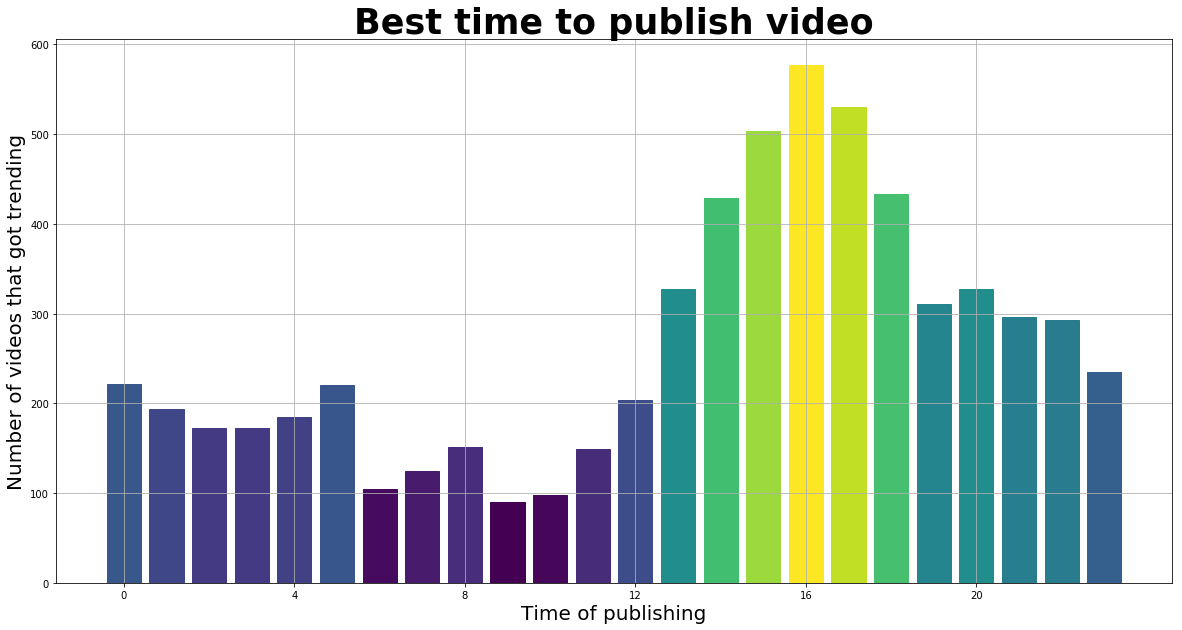

In [16]:
publish_h = [0] * 24

for index, row in videos_first.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()

In [17]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category']

most_frequent = videos.groupby(selected_columns)['video_id'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)

C:\Users\Malitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


Photo,Channel Name,Title,Category,Publish Date
,Lucas and Marcus,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment,2018-05-13
,Charlie Puth,Charlie Puth - BOY [Official Audio],Music,2018-05-11
,Rooster Teeth,Rooster Teeth Animated Adventures - Millie So Serious,Film & Animation,2018-05-14
,grav3yardgirl,Why I'm So Scared (being myself and crying too much),Howto & Style,2018-05-14
,SamSmithWorldVEVO,Sam Smith - Pray (Official Video) ft. Logic,Music,2018-05-09
,Unbox Therapy,"The ULTIMATE $30,000 Gaming PC Setup",Science & Technology,2018-05-13
,Complex,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Entertainment,2018-05-14
,nigahiga,FORTNITE The Movie (Official Fake Trailer),Entertainment,2018-05-11
,Selena Gomez,Selena Gomez - Back To You (Lyric Video),Film & Animation,2018-05-10
,BostonDynamics,"Getting some air, Atlas?",Science & Technology,2018-05-10
